#### What is the K-Means Algorithm?
K-Means is an unsupervised machine learning algorithm used for clustering. It partitions a dataset into K distinct clusters based on the similarity of data points. The algorithm follows these steps:

- Initialization: Choose K initial centroids randomly from the data points.
- Assignment: Assign each data point to the nearest centroid, forming K clusters.
- Update: Calculate the new centroids as the mean of the data points in each cluster.
- Repeat: Iterate steps 2 and 3 until the centroids no longer change significantly or a maximum number of iterations is reached.

#### Generate Random Data and Plot It for K-Means
Here's how to generate random data and visualize it:

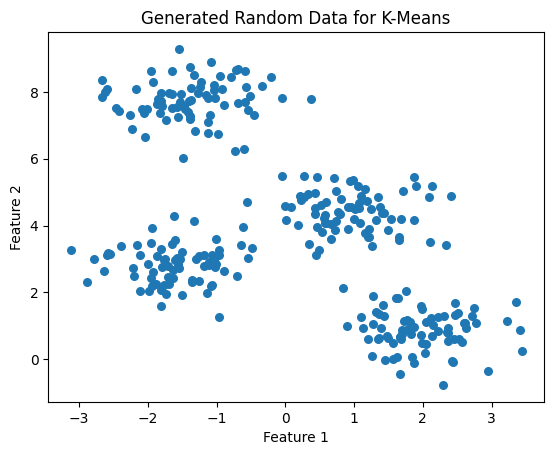

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate random data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title('Generated Random Data for K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#### Is K-Means Good for Regression or Classification or Both?
K-Means is primarily a clustering algorithm and is not directly used for regression or classification tasks. However, it can be used as a preprocessing step in these tasks, such as segmenting data before applying a classification algorithm.

#### Implement K-Means from Scratch Using Numpy
Here's a basic implementation of K-Means:

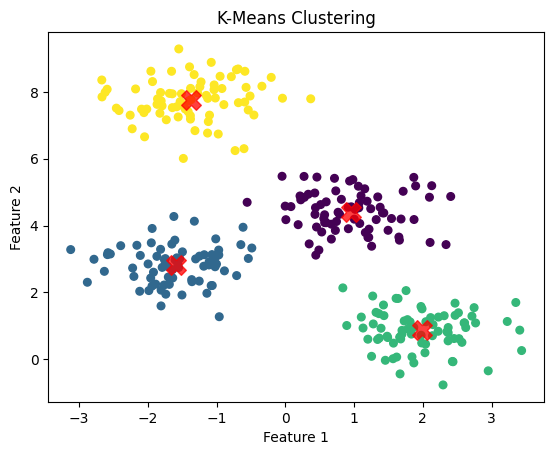

In [2]:
class KMeans:
    def __init__(self, n_clusters=3, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Randomly initialize centroids
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # Assign clusters
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Example usage
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, s=30, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#### When to Use K-Means and When Not to Use It
#### When to Use:

- When you have a large dataset.
- When the clusters are spherical and evenly sized.
- When you need a fast, simple clustering algorithm.

#### When Not to Use:

- When clusters have different shapes or sizes.
- When the number of clusters (K) is not known beforehand.
- When the dataset contains outliers, as they can skew the centroids.

#### What is the Loss Function?
In K-Means, the loss function is the sum of squared distances between each data point and its corresponding cluster centroid. This is often referred to as the "inertia" of the clustering solution.

#### How to Optimize the Algorithm
- Choosing K: Use methods like the Elbow method or Silhouette score to determine the optimal number of clusters.
- Initialization: Use techniques like K-Means++ for better initial centroid selection.
- Iterations: Ensure a maximum number of iterations to prevent long runtimes.

#### What Else Should I Know About K-Means?
- K-Means can converge to local minima, so it may be beneficial to run the algorithm multiple times with different initializations.
- It assumes that the number of clusters is fixed and does not adapt to the data distribution.
- K-Means is sensitive to outliers, which can affect the placement of centroids significantly.


#### How to find optimum number of clusters
To find the optimum number of clusters for K-Means, you can use methods such as the Elbow Method and Silhouette Score. Below are brief explanations and code examples for both methods.

#### 1. Elbow Method
The Elbow Method involves running K-Means for a range of cluster numbers (K) and plotting the sum of squared distances (inertia) for each K. The "elbow" point in the plot indicates the optimal number of clusters.

Code Example for Elbow Method:

/Users/rshankar/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rshankar/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rshankar/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rshankar/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

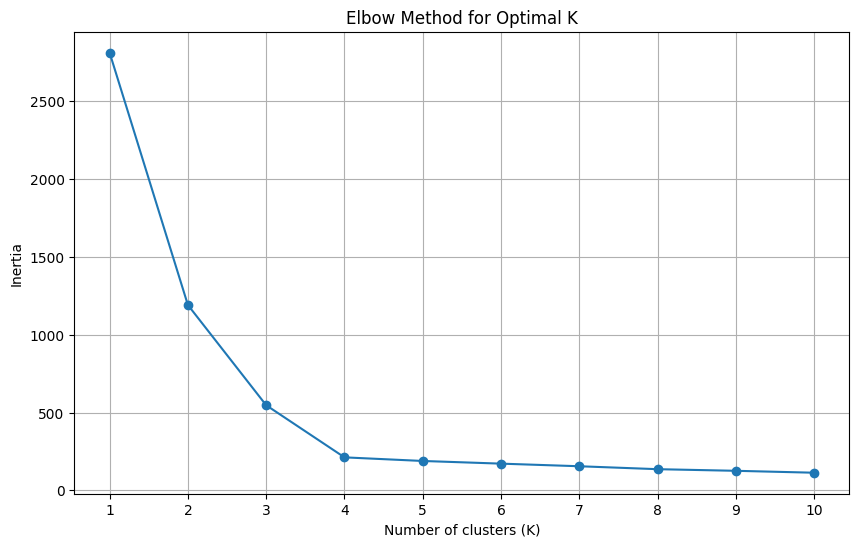

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate random data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Calculate inertia for different values of K
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()


#### 2. Silhouette Score
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a higher value indicates better-defined clusters.

Code Example for Silhouette Score:

/Users/rshankar/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rshankar/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rshankar/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rshankar/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

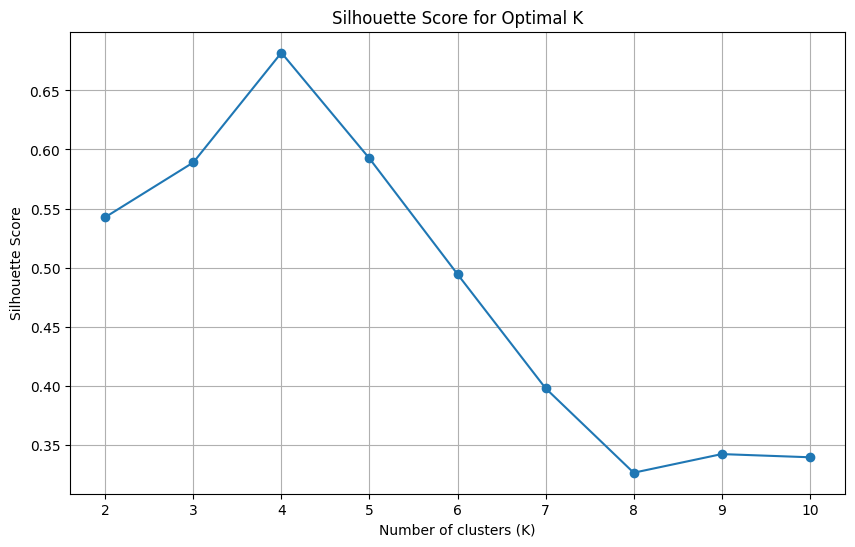

In [4]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for different values of K
silhouette_scores = []
K = range(2, 11)  # Start from 2, since silhouette is not defined for 1 cluster
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K)
plt.grid()
plt.show()


#### Arguments for Choosing Methods:
- Elbow Method: This method is intuitive and provides a straightforward way to visually inspect where increasing K does not result in a significant decrease in inertia.
- Silhouette Score: This method quantifies the cluster quality and can provide a more definitive indication of the optimal K by considering the density and separation of clusters.

Using both methods together can give you a more comprehensive view of the optimal number of clusters for your dataset.